In [1]:
from pprint import pprint
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
from matplotlib.ticker import MaxNLocator
from datetime import datetime
import pickle
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.metrics import classification_report
from comparers import ModelComparer, plot_decision_boundary
from tasks.running_example import make_task, make_test_set
from util import RuleClassifier, find_counterfactuals, counterfactuals_to_constraint_matrix,\
                 evaluate_counterfactual_fidelity, get_complexity
from surrogate_tree import train_surrogate_tree, tree_to_rules, plot_surrogate_tree,\
                 get_feature_importances, plot_feature_importances, plot_tree_leafs_for_class,\
                 tree_to_constraint_matrix, constraint_matrix_to_rules, extract_rules, print_rules,\
                 evaluate, search_max_depth_parameter

In [2]:
clf_a, clf_b, X, y, feature_names, feature_precisions = make_task()

In [3]:
comparer = ModelComparer(clf_a, clf_b, feature_names)

# Explanations

In [4]:
mclass_diff = comparer.predict_mclass_diff(X)

In [6]:
global_fidelities = {}
local_fidelities = {}
complexities = {}

## Tree with Depth 2

In [7]:
%%time
max_depth = 2
model = train_surrogate_tree(X, mclass_diff, max_depth=max_depth)

CPU times: user 3.44 ms, sys: 108 µs, total: 3.55 ms
Wall time: 3.7 ms


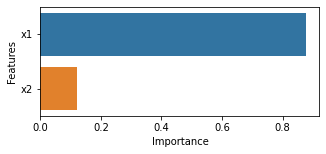

In [8]:
feature_importances, feature_order = get_feature_importances(model)
plot_feature_importances(feature_names, feature_importances, feature_order)

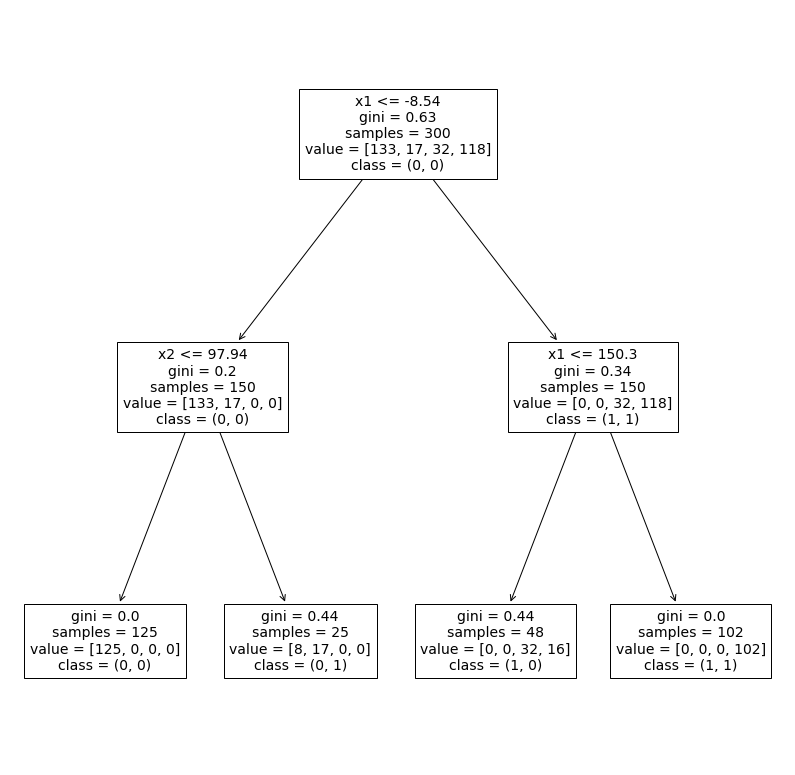

In [9]:
plot_surrogate_tree(model, feature_names, comparer.class_names, precision=2)

In [10]:
constraints, rules, class_occurences, labels, instance_indices_per_rule =\
    extract_rules(model, feature_names, comparer.difference_classes, X, mclass_diff)
print_rules(rules, class_occurences, comparer.class_names, labels)

1. -8.544832229614258 < x1 <= 150.29999542236328 => (1, 0) [0, 0, 32, 16]
2. x1 <= -8.544832229614258 and x2 > 97.94465255737305 => (0, 1) [8, 17, 0, 0]


Precision of the difference classes is rather low.

In [11]:
evaluate(model, X, mclass_diff, comparer.class_names)

,Precision,Recall,F1 Score,Support
"(0, 0)",1.000000,0.939850,0.968992,133
"(0, 1)",0.680000,1.000000,0.809524,17
"(1, 0)",0.666667,1.000000,0.800000,32
"(1, 1)",1.000000,0.864407,0.927273,118


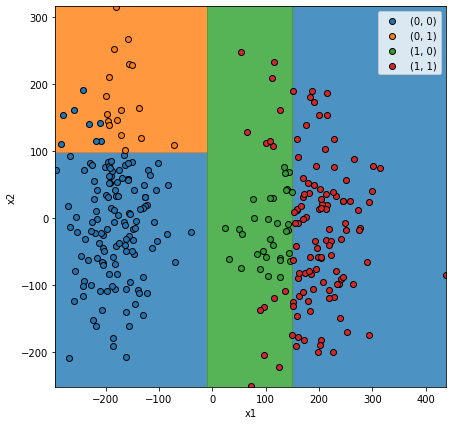

In [12]:
plot_tree_leafs_for_class(model, comparer.class_names, comparer.difference_class_names, X, mclass_diff, comparer.class_names, feature_names)

## Tree with Depth 3

In [92]:
%%time
max_depth = 3
model = train_surrogate_tree(X, mclass_diff, max_depth=max_depth)

CPU times: user 1.86 ms, sys: 1.34 ms, total: 3.2 ms
Wall time: 5.71 ms


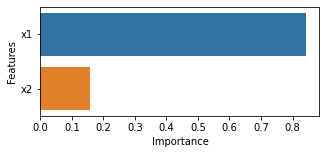

In [93]:
feature_importances, feature_order = get_feature_importances(model)
plot_feature_importances(feature_names, feature_importances, feature_order)

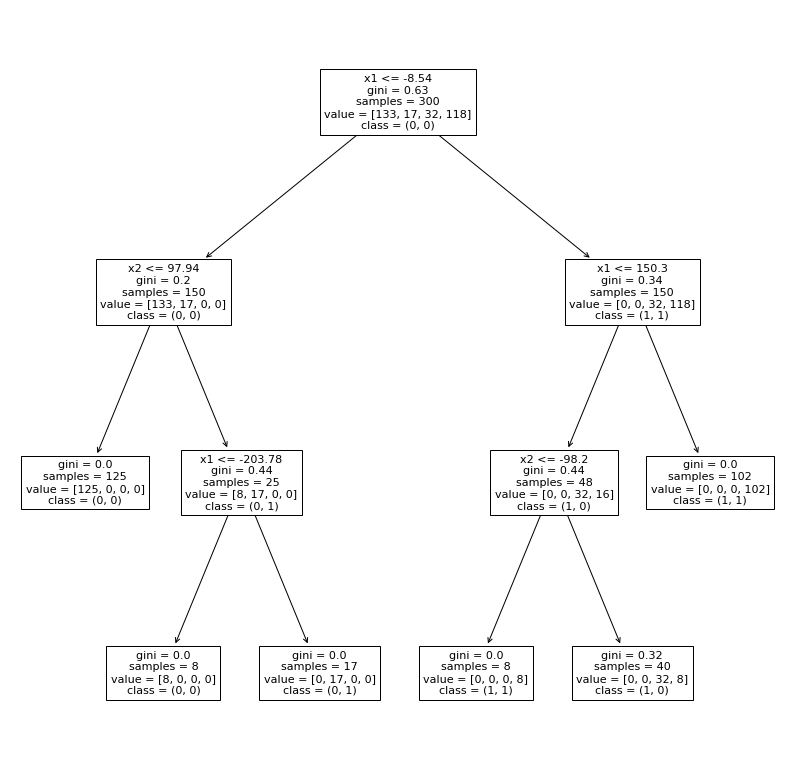

In [94]:
plot_surrogate_tree(model, feature_names, comparer.class_names, precision=2)

In [96]:
constraints, rules, class_occurences, labels, instance_indices_per_rule =\
    extract_rules(model, feature_names, comparer.classes, X, mclass_diff)
print_rules(rules, class_occurences, comparer.class_names, labels)

1. x1 <= -8.544832229614258 and x2 <= 97.94465255737305 => (0, 0) [125, 0, 0, 0]
2. x1 > 150.29999542236328 => (1, 1) [0, 0, 0, 102]
3. -8.544832229614258 < x1 <= 150.29999542236328 and x2 > -98.20289611816406 => (1, 0) [0, 0, 32, 8]
4. -203.77635192871094 < x1 <= -8.544832229614258 and x2 > 97.94465255737305 => (0, 1) [0, 17, 0, 0]
5. -8.544832229614258 < x1 <= 150.29999542236328 and x2 <= -98.20289611816406 => (1, 1) [0, 0, 0, 8]
6. x1 <= -203.77635192871094 and x2 > 97.94465255737305 => (0, 0) [8, 0, 0, 0]


Performance of $(0,1)$ is perfect, but $(1,0)$ still has rather low precision.

In [97]:
evaluate(model, X, mclass_diff, comparer.class_names)

,Precision,Recall,F1 Score,Support
"(0, 0)",1.0,1.000000,1.000000,133
"(0, 1)",1.0,1.000000,1.000000,17
"(1, 0)",0.8,1.000000,0.888889,32
"(1, 1)",1.0,0.932203,0.964912,118


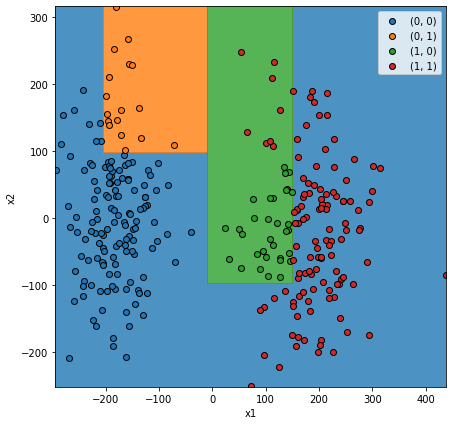

In [98]:
plot_tree_leafs_for_class(model, comparer.class_names, comparer.difference_class_names, X, mclass_diff, comparer.class_names, feature_names)

## Tree with Depth 4

In [99]:
%%time
max_depth = 4
model = train_surrogate_tree(X, mclass_diff, max_depth=max_depth)

CPU times: user 1.59 ms, sys: 343 µs, total: 1.94 ms
Wall time: 3.01 ms


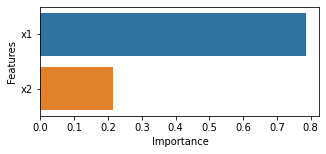

In [100]:
feature_importances, feature_order = get_feature_importances(model)
plot_feature_importances(feature_names, feature_importances, feature_order)

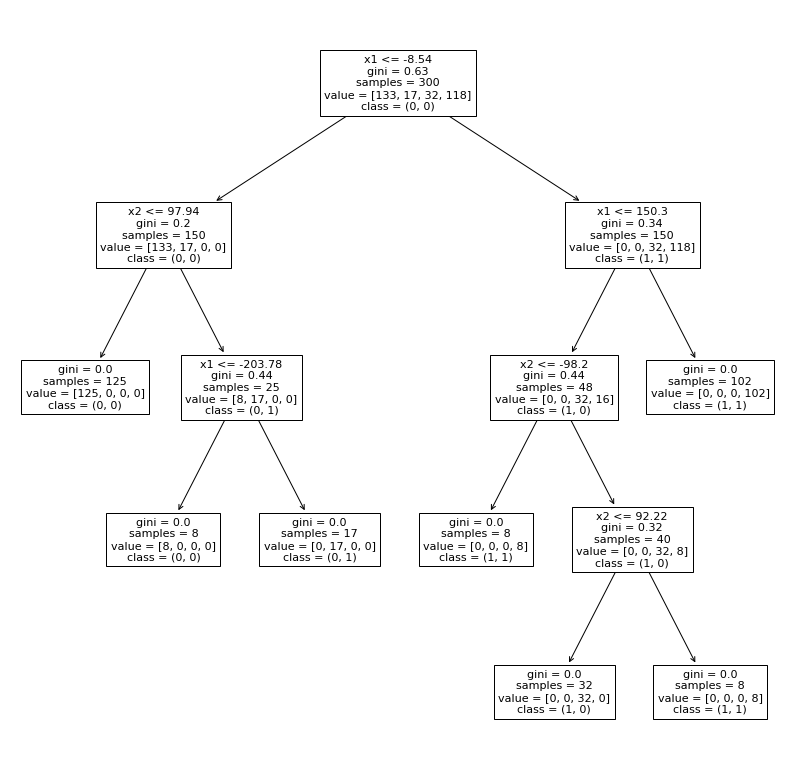

In [101]:
plot_surrogate_tree(model, feature_names, comparer.class_names, precision=2)

In [102]:
constraints, rules, class_occurences, labels, instance_indices_per_rule =\
    extract_rules(model, feature_names, comparer.classes, X, mclass_diff)
print_rules(rules, class_occurences, comparer.class_names, labels)

1. x1 <= -8.544832229614258 and x2 <= 97.94465255737305 => (0, 0) [125, 0, 0, 0]
2. x1 > 150.29999542236328 => (1, 1) [0, 0, 0, 102]
3. -8.544832229614258 < x1 <= 150.29999542236328 and -98.20289611816406 < x2 <= 92.22273635864258 => (1, 0) [0, 0, 32, 0]
4. -203.77635192871094 < x1 <= -8.544832229614258 and x2 > 97.94465255737305 => (0, 1) [0, 17, 0, 0]
5. -8.544832229614258 < x1 <= 150.29999542236328 and x2 > 92.22273635864258 => (1, 1) [0, 0, 0, 8]
6. -8.544832229614258 < x1 <= 150.29999542236328 and x2 <= -98.20289611816406 => (1, 1) [0, 0, 0, 8]
7. x1 <= -203.77635192871094 and x2 > 97.94465255737305 => (0, 0) [8, 0, 0, 0]


Performance of both difference classes is perfect.

In [103]:
evaluate(model, X, mclass_diff, comparer.class_names)

,Precision,Recall,F1 Score,Support
"(0, 0)",1.0,1.0,1.0,133
"(0, 1)",1.0,1.0,1.0,17
"(1, 0)",1.0,1.0,1.0,32
"(1, 1)",1.0,1.0,1.0,118


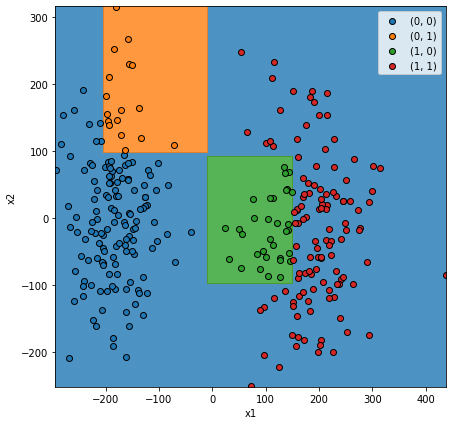

In [104]:
plot_tree_leafs_for_class(model, comparer.class_names, comparer.difference_class_names, X, mclass_diff, comparer.class_names, feature_names)

## Evaluation

### Fidelity

In [105]:
X_test = make_test_set()
y_test = comparer.predict_mclass_diff(X_test)

In [106]:
metrics = search_max_depth_parameter(X, mclass_diff, feature_names, comparer.class_names, X_test=X_test, y_test=y_test)

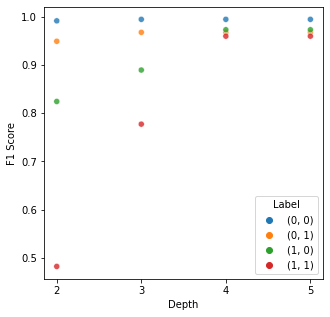

In [107]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(data=metrics, x='Depth', y='F1 Score', hue='Label', alpha=0.8, ax=ax)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.savefig('running-fidelity.pdf')

In [108]:
metrics

,Depth,Label,Precision,Recall,F1 Score,Rules,Constraints
0,2,"(0, 0)",0.989916,0.993827,0.991868,1,2
1,2,"(0, 1)",0.961240,0.937973,0.949464,1,2
2,2,"(1, 0)",0.701637,0.999386,0.824453,1,2
3,2,"(1, 1)",0.996909,0.317734,0.481883,1,1
4,3,"(0, 0)",0.989978,1.000000,0.994964,2,4
5,3,"(0, 1)",1.000000,0.937973,0.967994,1,3
6,3,"(1, 0)",0.824902,0.965634,0.889737,1,3
7,3,"(1, 1)",0.924016,0.670936,0.777397,2,4
8,4,"(0, 0)",0.989978,1.000000,0.994964,2,4
9,4,"(0, 1)",1.000000,0.937973,0.967994,1,3


### Outlier Classified Correctly?

In [82]:
X_test = np.array([[-15, -110]])

In [85]:
rclf = RuleClassifier(feature_names, rules)
rclf.predict(X_test)

array([False])

### Generation Time

<1s